# Pymaceuticals Inc.
---

### Analysis

- After removing the duplicate mice, the total number of mice is 249. The gender breakdown includes 124 female mice and 125 male mice.
- The selected treatments, Capomulin and Ramicane, are more effective at reducing tumor size.
- The correlation between mouse weight and average tumor volume indicates a strong positive relationship: as mouse weight increases, the average tumor volume also increases.
 

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [143]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [144]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [145]:
# Combine the data into a single DataFrame
combined_mouse = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [146]:
# Checking the number of mice.
mouse_number = combined_mouse["Mouse ID"].nunique()

mouse_number

249

In [147]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_mouse.groupby(by=["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [148]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = combined_mouse[combined_mouse.duplicated(['Mouse ID'], keep=False)]

duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [149]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = combined_mouse.drop_duplicates(subset=['Mouse ID'])
clean_df = combined_mouse.drop_duplicates(subset=['Mouse ID','Timepoint'])

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [150]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

avg_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
avg_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [152]:
med_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
med_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [153]:
tumor_vol_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [154]:
tumor_vol_std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [155]:
tumor_vol_std_err = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_vol_std_err

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [156]:
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
        "Mean Tumor Volume": avg_tumor.values,
        "Median Tumor Volume": med_tumor.values, 
        "Tumor Volume Variance": tumor_vol_var.values, 
        "Tumor Volume Std. Dev.": tumor_vol_std_dev.values,
        "Tumor Volume Std. Err.": tumor_vol_std_err.values
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,40.675741,41.557809,24.947764,4.994774,0.329346
1,52.591172,51.776157,39.290177,6.268188,0.469821
2,52.884795,51.820584,43.128684,6.567243,0.492236
3,55.235638,53.698743,68.553577,8.279709,0.603860
4,54.331565,52.509285,66.173479,8.134708,0.596466
5,54.033581,52.288934,61.168083,7.821003,0.581331
6,52.393463,50.909965,43.138803,6.568014,0.525862
7,40.216745,40.673236,23.486704,4.846308,0.320955
8,54.233149,52.431737,59.450562,7.710419,0.573111
9,53.236507,51.818479,48.533355,6.966589,0.516398


In [157]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

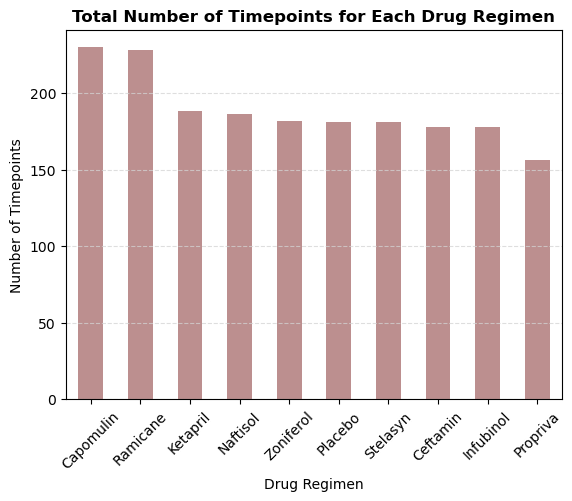

In [158]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df.groupby('Drug Regimen').size().sort_values(ascending=False).plot(kind='bar', color='rosybrown')
plt.title('Total Number of Timepoints for Each Drug Regimen', fontweight="bold")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)
plt.show()


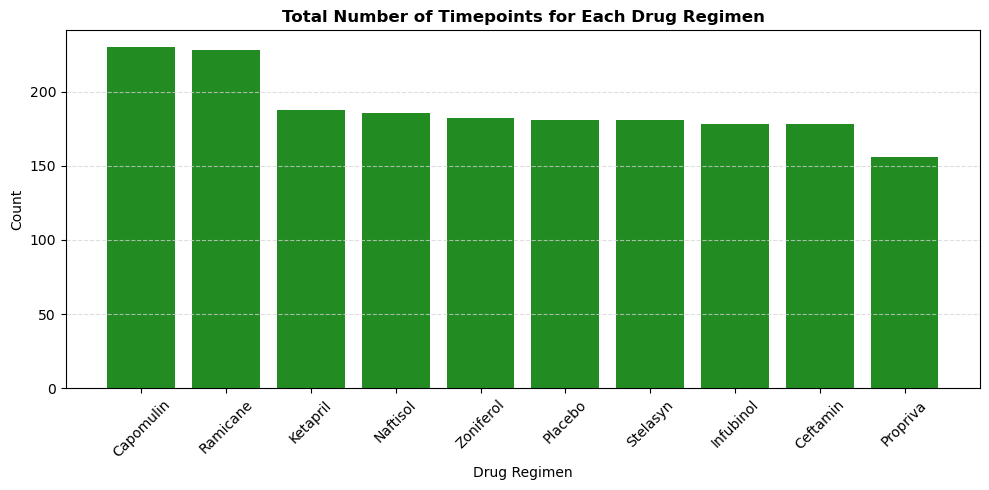

In [159]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 5))  
plt.bar(drug_counts.index, drug_counts.values, color='forestgreen')  
plt.title('Total Number of Timepoints for Each Drug Regimen', fontweight="bold") 
plt.xlabel('Drug Regimen') 
plt.ylabel('Count') 
plt.xticks(rotation=45)  
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)
plt.tight_layout()  
plt.show() 

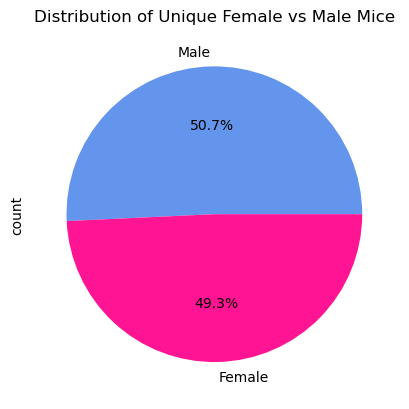

Sex
Male      958
Female    930
Name: count, dtype: int64

In [187]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

gender_counts = clean_df.Sex.value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', title='Distribution of Unique Female vs Male Mice', colors=["cornflowerblue", "deeppink"], autopct="%1.1f%%")
plt.show()

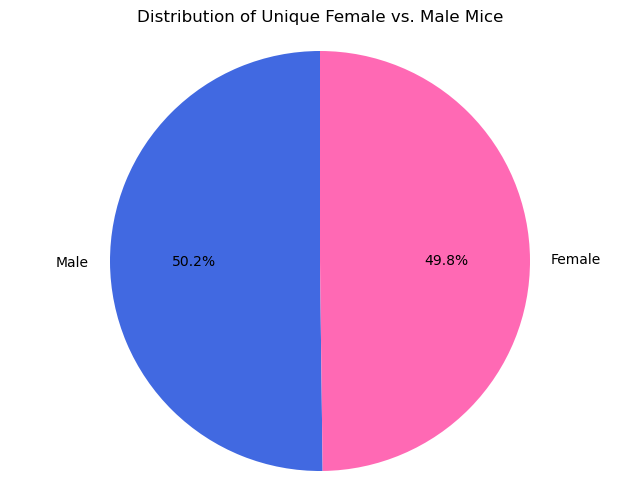

In [161]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = unique_counts.Sex.value_counts()

# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, colors=["royalblue", "hotpink"], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unique Female vs. Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_time = pd.merge(clean_df, timepoint, on=["Mouse ID", "Timepoint"], how="right")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = tumor_time["Drug Regimen"].isin(drugs)
tumor_time = tumor_time.loc[mask].reset_index(drop=True)
tumor_time


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_df[clean_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1 

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f'{treatment} potential outliers: {outliers.tolist()}')

Capomulin potential outliers: [25.47214326, 23.34359787]
Ramicane potential outliers: [22.05012627]
Infubinol potential outliers: []
Ceftamin potential outliers: []


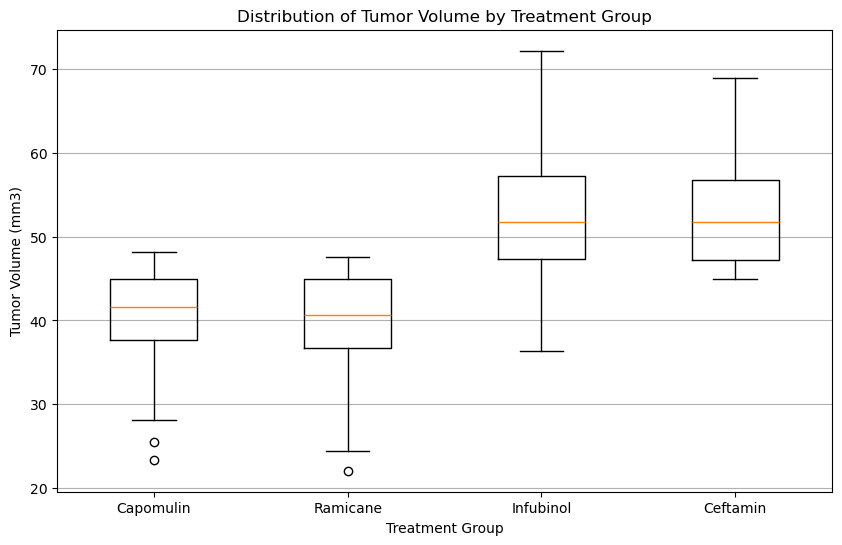

In [164]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, tick_labels=treatments)

# Adding titles and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')

plt.show()

## Line and Scatter Plots

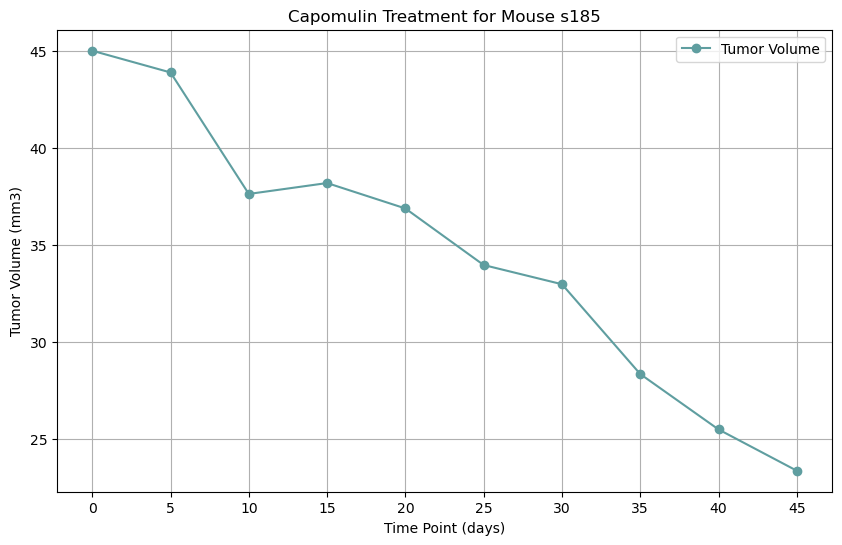

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse ID (replace 'mouse_id' with an actual mouse ID from the Capomulin group)
mouse_id = 's185'  
mouse_data = clean_df.loc[clean_df['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color = 'cadetblue', label='Tumor Volume')

# Adding titles and labels
plt.title(f'Capomulin Treatment for Mouse {mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(mouse_data['Timepoint'])  
plt.legend()
plt.grid()

# Show the plot
plt.show()

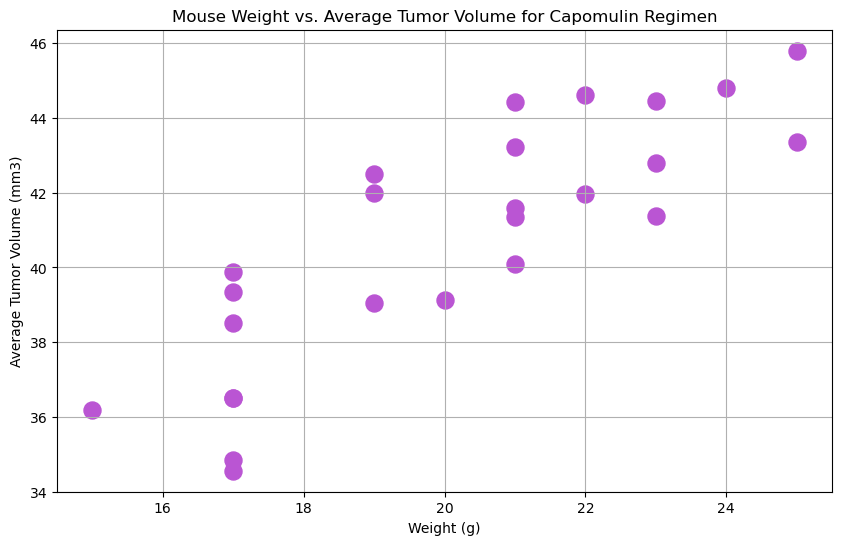

In [182]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse weight data
mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='mediumorchid', s=150)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

In [174]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
x_values = merged_data["Weight (g)"]
y_values = merged_data["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


In [175]:
rvalue

0.8419363424694721

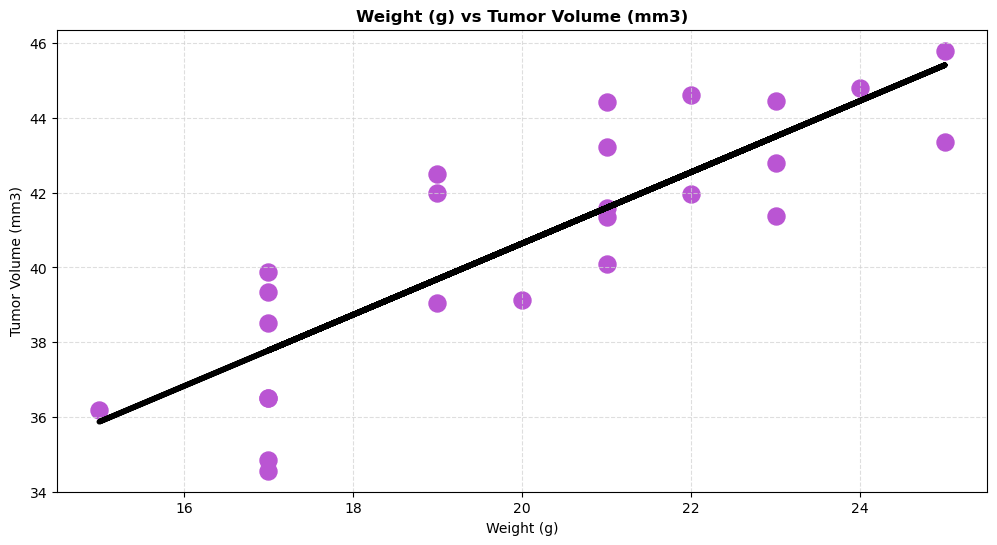

In [183]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='mediumorchid', s=150)
plt.plot(merged_data["Weight (g)"], regress_values, color="black", linewidth=4) # the regression 
      
#Customizations
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(line_eq, (22, 30), fontsize=16, color="black")

#Show/Save the Graph
plt.show()

